In [42]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [43]:
file_names = ["14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23"]

In [44]:
pre_monsoon_deaths=[]
monsoon_deaths=[]
post_monsoon_deaths=[]

In [45]:
pre_monsoon_months = [3, 4, 5]
monsoon_months = [6, 7, 8]
post_monsoon_months = [10, 11, 12]

In [46]:
for file_name in file_names:
 
    file_path = f"{file_name}.xls"
 
    xls = pd.ExcelFile(file_path)

    df = pd.read_excel(xls)

    
    filtered_df = df[df["Incident"] == "Thunderbolt"].copy()

    
    filtered_df["Month"] = pd.to_datetime(filtered_df["Incident Date"]).dt.month

    pre_monsoon_sum = filtered_df[filtered_df["Month"].isin(pre_monsoon_months)]["Total Death"].sum()
    monsoon_sum = filtered_df[filtered_df["Month"].isin(monsoon_months)]["Total Death"].sum()
    post_monsoon_sum = filtered_df[filtered_df["Month"].isin(post_monsoon_months)]["Total Death"].sum()
    
    # Append the sums to respective lists
    pre_monsoon_deaths.append(pre_monsoon_sum)
    monsoon_deaths.append(monsoon_sum)
    post_monsoon_deaths.append(post_monsoon_sum)

In [47]:

print("All Pre-Monsoon Deaths:", pre_monsoon_deaths)
print("All Monsoon Deaths:", monsoon_deaths)
print("All Post-Monsoon Deaths:", post_monsoon_deaths)

All Pre-Monsoon Deaths: [36, 52, 41, 48, 49, 26, 33, 25, 24]
All Monsoon Deaths: [36, 32, 51, 28, 23, 48, 31, 21, 43]
All Post-Monsoon Deaths: [7, 6, 6, 0, 0, 2, 0, 1, 5]


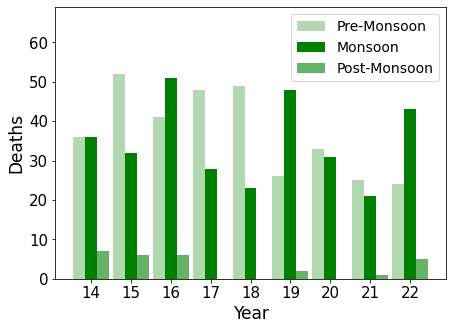

In [52]:

bar_width = 0.3
index = np.arange(len(file_names))



years = ['14','15' ,'16', '17','18', '19', '20', '21','22']

fig, ax = plt.subplots(figsize=(7, 5))
pre_bar = ax.bar(index, pre_monsoon_deaths, bar_width, label='Pre-Monsoon', color='green', alpha=0.3)
monsoon_bar = ax.bar(index + bar_width, monsoon_deaths, bar_width, label='Monsoon', color='green', alpha=1)
post_bar = ax.bar(index + 2 * bar_width, post_monsoon_deaths, bar_width, label='Post-Monsoon', color='green', alpha=0.6)



ax.set_xticks(index + bar_width)
ax.set_xticklabels(years)
ax.legend(fontsize=14)
plt.tick_params(axis='y', labelsize=15)

plt.tick_params(axis='x', labelsize=15)
plt.ylim(0,69) 


plt.xlabel('Year', fontsize=17)
plt.ylabel('Deaths', fontsize=17)


plt.show()